### Crosstab, Barcharts, and Tables

This notebook demonstrates how to easily generate contingency tables for chi-square tests for independence and how to generate publication-quality figures from the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# Let's import a data set and peak at it.
ufo = pd.read_csv('https://raw.githubusercontent.com/prof-groff/evns462/master/data/ufo.csv')
ufo.head(5)

,Event.Date,Shape,Location,State,Country,Source,USA
0,6/18/2016,Boomerang/V-Shaped,South Barrington,IL,USA,NUFORC,1
1,6/17/2016,Boomerang/V-Shaped,Kuna,ID,USA,NUFORC,1
2,5/30/2016,Boomerang/V-Shaped,Lake Stevens,WA,USA,NUFORC,1
3,5/27/2016,Boomerang/V-Shaped,Gerber,CA,USA,NUFORC,1
4,5/24/2016,Boomerang/V-Shaped,Camdenton,MO,USA,NUFORC,1


In [3]:
# Let's pull out data for HI and AK and peak at it.
ufo_bystate = ufo.groupby('State')
ufo_HI_AK = pd.concat([ufo_bystate.get_group('FL '), ufo_bystate.get_group('AK ')])
ufo_HI_AK.head(5)

,Event.Date,Shape,Location,State,Country,Source,USA
5,5/21/2016,Boomerang/V-Shaped,Ft. Lauderdale,FL,USA,NUFORC,1
45,7/9/2016,Cigar/Cylinder,Oldsmar,FL,USA,NUFORC,1
46,7/9/2016,Cigar/Cylinder,Saint Augustine,FL,USA,NUFORC,1
52,7/4/2016,Cigar/Cylinder,Orlando,FL,USA,NUFORC,1
80,5/11/2016,Cigar/Cylinder,Gulf of Mexico,FL,USA,NUFORC,1


In [4]:
# Let's pull out data for Lights Only, Circle, and Sphere UFO shapes and peak at it.
shapes = ['Lights Only ', 'Circle ', 'Orb/Sphere ']
ufo_byshape = ufo_HI_AK.groupby('Shape')
ufo_final = pd.concat([ufo_byshape.get_group(s) for s in shapes])
ufo_final.head(5)

,Event.Date,Shape,Location,State,Country,Source,USA
1219,7/18/2016,Lights Only,Lower Haines City,FL,USA,NUFORC,1
1227,7/16/2016,Lights Only,Land O'Lakes,FL,USA,NUFORC,1
1231,7/14/2016,Lights Only,Apopka,FL,USA,NUFORC,1
1254,7/8/2016,Lights Only,Cape Coral,FL,USA,NUFORC,1
1255,7/8/2016,Lights Only,Lauderhill,FL,USA,NUFORC,1


In [5]:
# Let's construct a crosstab (contingency) table.
contingency = pd.crosstab(index=ufo_final['State'], columns=ufo_final['Shape'])
print(contingency)

Shape  Circle   Lights Only   Orb/Sphere 
State                                    
AK           6            10            5
FL          41            48           30


In [6]:
# Let's do a chi square test for homogeneity
statistic, pvalue, dof, exp = stats.chi2_contingency(contingency)
print('statistics:', statistic, 'pvalue:', pvalue, 'dof:', dof)
print('expected counts:')
print(exp)

statistics: 0.426518369637 pvalue: 0.807946702557 dof: 2
expected counts:
[[  7.05   8.7    5.25]
 [ 39.95  49.3   29.75]]


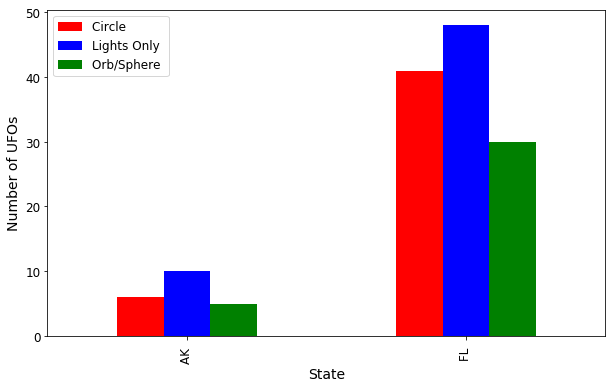

In [7]:
# Let's make a barplot to summarize our contingency table
contingency.plot.bar(color=['r', 'b', 'g'], figsize=(10,6))
plt.ylabel('Number of UFOs', fontsize=14)
plt.xlabel('State', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend(fontsize=12)
plt.savefig('my_bars.png',dpi=100)
plt.show()

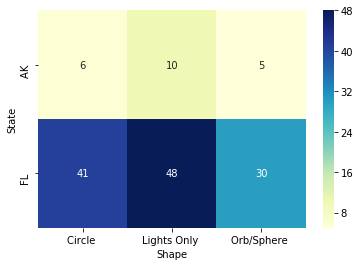

In [8]:
# In Python you can do amazing things. Here is a heatmap of the contingency table made using seaborn
import seaborn as sns
sns.heatmap(contingency, annot=True, cmap="YlGnBu")
plt.show()